# **혼자 공부하는 머신러닝 + 딥러닝 CH 3**

## **K-최근접 이웃 회귀 / 농어 무게 예측**

### **데이터 준비**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)

In [9]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [12]:
knr = KNeighborsRegressor()

In [13]:
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [14]:
print(knr.score(X_test, y_test))

0.9928094061010639


In [16]:
test_prediction = knr.predict(X_test)
mae = mean_absolute_error(y_test, test_prediction)
print(mae)

19.157142857142862


In [17]:
print(knr.score(X_train, y_train))

0.9698823289099255


In [18]:
knr.n_neighbors = 3

In [19]:
knr.fit(X_train, y_train)
print(knr.score(X_test, y_test))

0.974645996398761


## **농어 무게 예측 / 선형 회귀**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [21]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state = 42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [30]:
lr = LinearRegression()

lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.8247503123313558


In [31]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


In [ ]:
plt.scatter(perch_length, perch_weight)
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
plt.scatter(50,1241.8, marker='^')

In [35]:
X_train_poly = np.column_stack((X_train ** 2, X_train))
X_test_poly = np.column_stack((X_test ** 2, X_test))

In [36]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

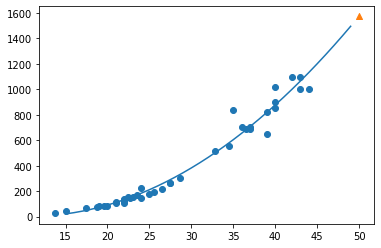

In [38]:
point = np.arange(15,50)

plt.scatter(X_train, y_train)
plt.plot(point, lr_poly.coef_[0]*point**2 + lr_poly.coef_[1]*point + lr_poly.intercept_)
plt.scatter([50],[1574], marker='^')
plt.show()